#Credit Card Fraud Detection Analysis

#Importing the Dependencies

In [ ]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#to load dataset 
df=pd.read_csv('/content/drive/MyDrive/ML/creditcard.csv.csv')
#to display first 5 records 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

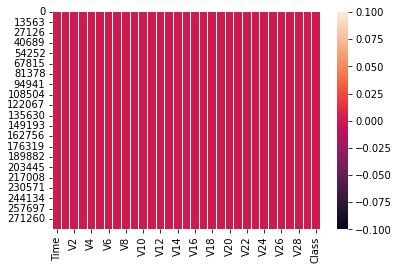

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#divide into input and output
X=df.drop("Class",axis=1)
Y=df["Class"]

In [ ]:
#train_test_split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
#apply sacaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
#create user defiend function 
def create_model(model):
  model.fit(X_train,Y_train) #train the model 
  Y_pred=model.predict(X_test) #test the model 
  print(classification_report(Y_test,Y_pred))
  print(confusion_matrix(Y_test,Y_pred))
  return model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443

[[85293    15]
 [   57    78]]


#Sampling Technique

In [ ]:
#check if the data is equally distribute or not 
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#Here  our data  is not equally distribute  so we  sampling  to make it equally distribute
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler()

In [ ]:
X_train_ros,Y_train_ros, =ros.fit_resample(X_train,Y_train)

In [ ]:
Y_train_ros.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [ ]:
X_test_ros,Y_test_ros, =ros.fit_resample(X_test,Y_test)

In [ ]:
Y_test_ros.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

logistic regression 

In [ ]:
#create user defiend function 
def create_model1(model):
  model.fit(X_train_ros,Y_train_ros) #train the model 
  Y_pred=model.predict(X_test_ros) #test the model 
  print(classification_report(Y_test_ros,Y_pred))
  print(confusion_matrix(Y_test_ros,Y_pred))
  return model

In [ ]:
#create base line mode 
lr1=LogisticRegression()
lr1=create_model1(lr1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.89      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83736  1572]
 [ 8972 76336]]


#DECISION TREE

#decision tree with ginni index

In [ ]:
#ginni index
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt=create_model1(dt)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.66      0.79     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.82    170616
weighted avg       0.87      0.83      0.82    170616

[[85277    31]
 [29190 56118]]


#ginni index eith maxx deep

In [ ]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)
dt=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     85308
           1       0.98      0.84      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

[[84017  1291]
 [13424 71884]]


In [ ]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=3)
dt=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.90    170616
weighted avg       0.92      0.91      0.90    170616

[[84530   778]
 [15351 69957]]


#ginni index with min sample leaf 


In [ ]:
dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=100)
dt=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.83      1.00      0.90     85308
           1       0.99      0.79      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

[[84901   407]
 [17874 67434]]


#decission tree with entropy

In [ ]:
#decission tree using entropy 
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3)
dt=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.85      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

[[82844  2464]
 [12823 72485]]


#ENTROPY WITH MIN SAMPLE LEAF

In [ ]:
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=100)
dt=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

[[84978   330]
 [17194 68114]]


In [ ]:
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=90)
dt=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

[[85015   293]
 [17194 68114]]


In [ ]:
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=20)
dt=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.83      1.00      0.90     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616

[[85214    94]
 [17807 67501]]


#RANDOM FOREST CLASSIFIER 

In [ ]:
#Random forest tree using 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=create_model1(rf)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

[[85299     9]
 [19145 66163]]


In [ ]:
#using entropy 
dt1=RandomForestClassifier(random_state=1,criterion='entropy',n_estimators=100,max_features=4)
dt=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.91      0.88      0.88    170616
weighted avg       0.91      0.88      0.88    170616

[[85300     8]
 [19843 65465]]


In [ ]:
#show the information gain of all input  feature 
IG=dt.feature_importances_
I=X.columns
d={"Input columns":I,"Inforamtion Gain":IG}
#converts into dataframe 
F=pd.DataFrame(d)
F.sort_values("Inforamtion Gain",ascending=False,ignore_index=True) #descending order 

,Input columns,Inforamtion Gain
0,V14,0.171855
1,V10,0.113497
2,V4,0.098917
3,V17,0.092949
4,V11,0.075904
5,V12,0.074606
6,V16,0.053888
7,V3,0.035481
8,V7,0.031092
9,V2,0.025292


#BOOSTING

ADA BOOSTING 

In [ ]:
#Using ADA Boosting
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,random_state=1)
ada=create_model1(ada)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.98      0.86      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[84077  1231]
 [12087 73221]]


Gradient boosting 

In [ ]:
from scipy.sparse.construct import random
#using gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=50,random_state=1)
gb=create_model1(gb)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     85308
           1       0.99      0.88      0.93     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[84577   731]
 [10188 75120]]


EXTREME GRADIENT BOOSTING 

In [ ]:
#Using extreme gradient boosting 
from xgboost import XGBClassifier
xg=GradientBoostingClassifier(n_estimators=50,random_state=1)
xg=create_model1(xg)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     85308
           1       0.99      0.88      0.93     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[84577   731]
 [10188 75120]]


#Support Vector Machine(SVM)

---



Linear SVC


In [ ]:
#USING LINEAR SVC
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[83922  1386]
 [10201 75107]]


In [ ]:
svc=LinearSVC(random_state=1,C=0.8)
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[83884  1424]
 [10201 75107]]


In [ ]:
svc=LinearSVC(random_state=1,C=0.9) 
svc=create_model1(svc)


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.89      0.93     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83871  1437]
 [ 9570 75738]]


#Polynomial kernel function

In [ ]:
#polynomial kernel function
from sklearn.svm import SVC 
svc=SVC(random_state=1,kernel="poly") 
svc=create_model1(svc)

#SVC Radial Basis Kernel Function

In [ ]:
svr=SVC(random_state=1,kernel='rbf')
svr=create_model(svr)

#Applying Model - KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knc=create_model(knc) 

#Conclusion

 We can say that Support Vector Machine giving the best Result of 90% predict.